In [15]:
import pandas as pd
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows',None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth',0)
import unicodedata

import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
np.set_printoptions(threshold='nan')

In [16]:
df = pd.read_csv('train.tsv', sep='\t', index_col =None)
df

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,Label,Id
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1,10101
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2,10102
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1,10103
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1,10104
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2,10105
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,4,A124,35,A143,A153,1,A172,2,A192,A201,1,10106
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,4,A122,53,A143,A152,1,A173,1,A191,A201,1,10107
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,2,A123,35,A143,A151,1,A174,1,A192,A201,1,10108
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,4,A121,61,A143,A152,1,A172,1,A191,A201,1,10109
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,2,A123,28,A143,A152,2,A174,1,A191,A201,2,10110


In [17]:
good = df[df["Label"]==1]    #good
bad = df[df["Label"]==2]    #bad

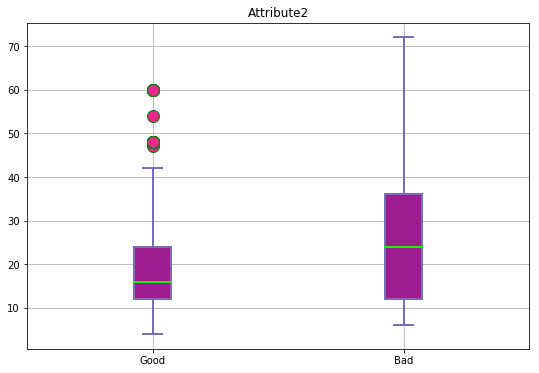

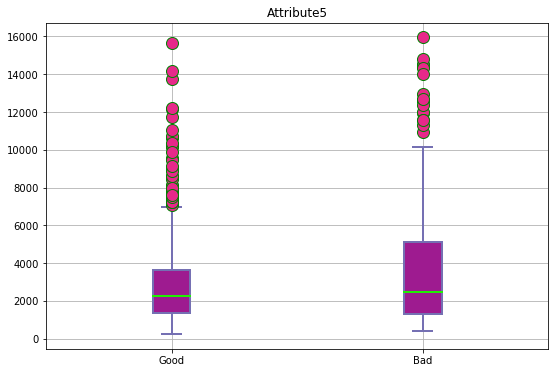

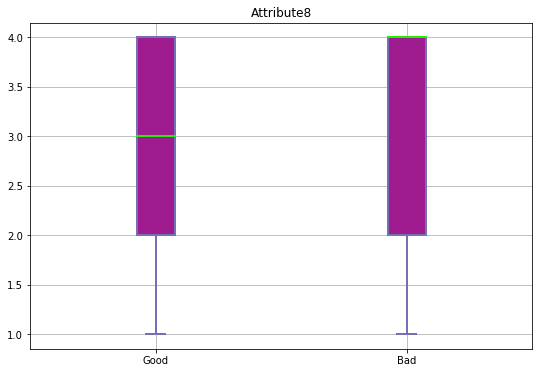

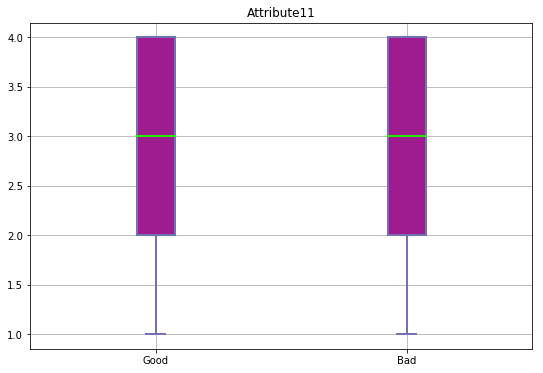

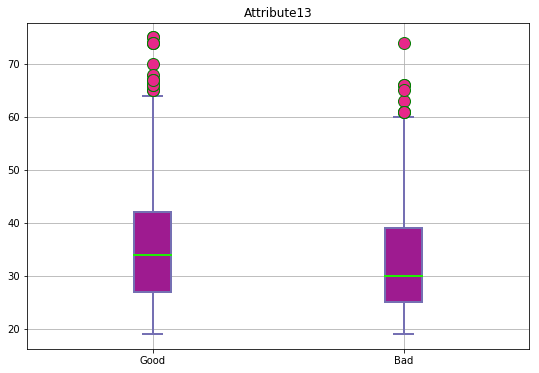

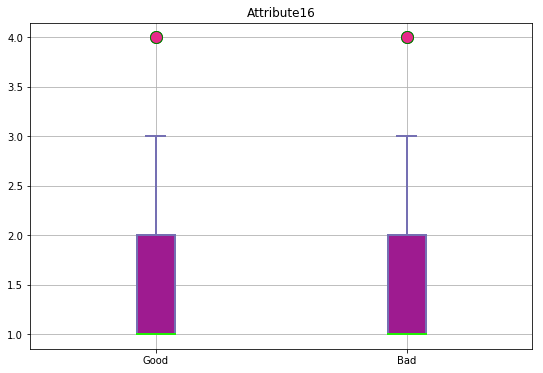

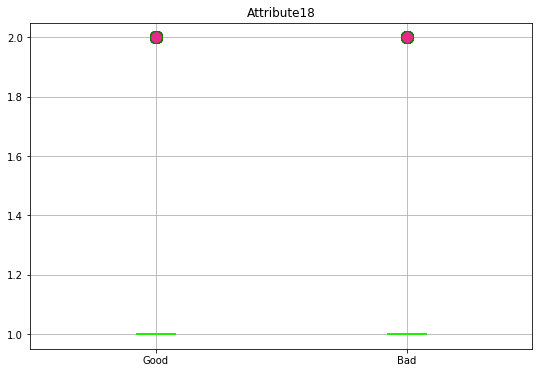

In [18]:
#Numericals
Attributes = ["Attribute2","Attribute5","Attribute8","Attribute11","Attribute13","Attribute16","Attribute18"]

for attribute in Attributes: 
    Attribute_good = good[[attribute]]
    Attribute_bad = bad[[attribute]]
    
    #convert data into list
    Attribute2_good = list(Attribute_good.values.flatten())
    Attribute2_bad = list(Attribute_bad.values.flatten())
    
    
    data_to_plot = [Attribute2_good, Attribute2_bad]

    # Create a figure instance
    fig = plt.figure(1, figsize=(9, 6))

    # Create an axes instance
    ax = fig.add_subplot(111)


    # Create the boxplot
    ## change the style of fliers and their fill
    flierprops = dict(marker='o', markerfacecolor='#e7298a', markersize=12,
                  linestyle='none', markeredgecolor='g') 
    
    #Create the boxplot
    bp = ax.boxplot(data_to_plot, patch_artist=True, flierprops= flierprops)
    
    #Change color

    ## change outline color, fill color and linewidth of the boxes
    for box in bp['boxes']:
        # change outline color
        box.set( color='#7570b3', linewidth=2)
        # change fill color
        box.set( facecolor = '#9e1b90' )

    ## change color and linewidth of the whiskers
    for whisker in bp['whiskers']:
        whisker.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the caps
    for cap in bp['caps']:
        cap.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the medians
    for median in bp['medians']:
        median.set(color='#20ef04', linewidth=2)

    ## change the style of fliers and their fill
    #for flier in bp['fliers']:
     #   flier.set(marker='o', color='#e7298a', alpha=0.5)
        
      

    #Set grid
    ax.grid()

    #Set labels
    ax.set_xticklabels(['Good', 'Bad'])    

    #Set title
    plt.title(attribute)
    plt.show()

    # Save the figure
    #fig.savefig('fig1.png', bbox_inches='tight')


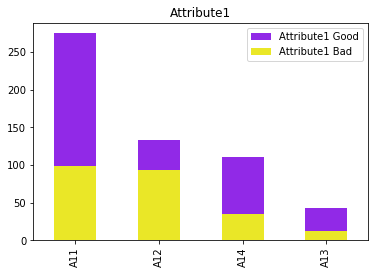

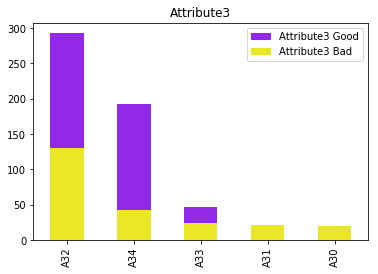

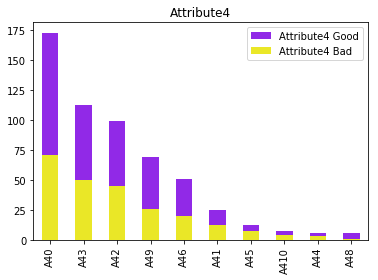

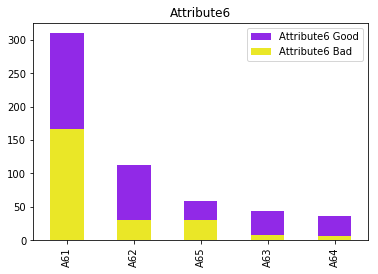

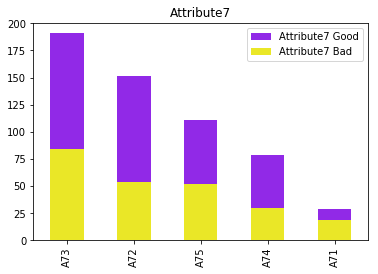

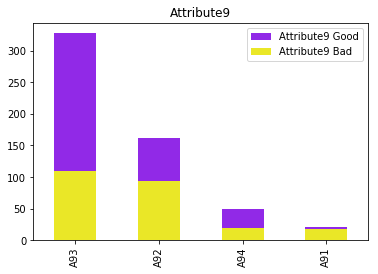

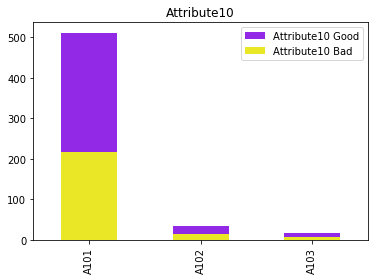

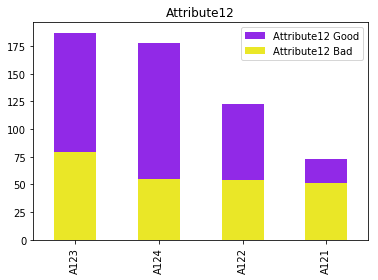

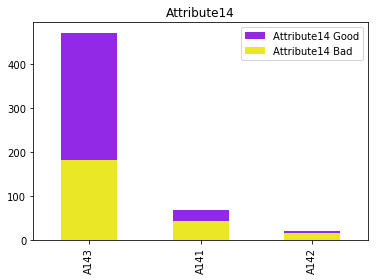

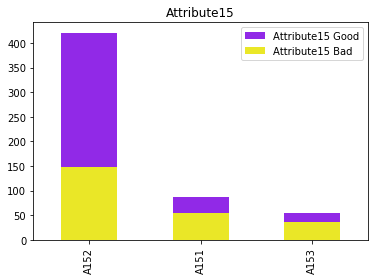

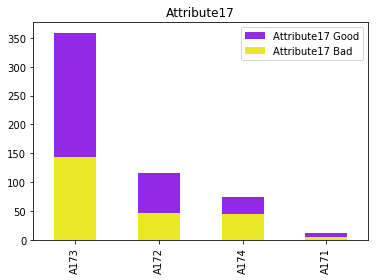

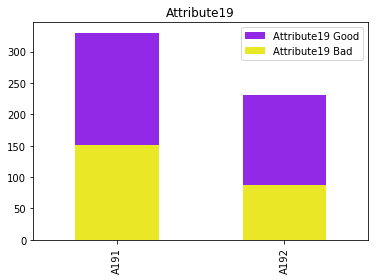

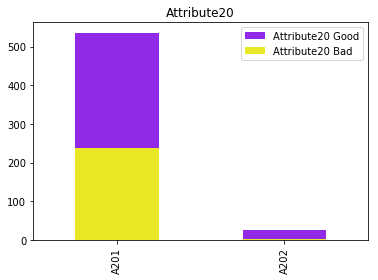

In [19]:
#for categorical data


attributesCategorical = ['Attribute1','Attribute3','Attribute4','Attribute6','Attribute7','Attribute9','Attribute10'
              ,'Attribute12','Attribute14','Attribute15','Attribute17','Attribute19','Attribute20']

for item in attributesCategorical:

    attributeGood = pd.Series(good[item])
    attributeBad = pd.Series(bad[item])
    stringGood = item + " Good"
    stringBad = item + " Bad"

    plt.title(item)
    attributeGood.value_counts().plot(kind='bar',label= stringGood, color = '#9129e7' )
    attributeBad.value_counts().plot(kind='bar',label= stringBad, color = '#eae727')
    plt.legend()
    plt.show()

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

withoutLabel = df.ix[:, df.columns != 'Label' ]
withoutLabelAndId = withoutLabel.ix[:, withoutLabel.columns != 'Id' ]

Count_Row = withoutLabelAndId.shape[0]

listOfDocuments= []
for i in range(Count_Row):
    documents = withoutLabelAndId.iloc[i]
    documents = documents.to_string(index=False , header = False).encode('utf8')
    listOfDocuments.append(documents)
    
    
tupleOfDocuments = tuple(listOfDocuments)


tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(tupleOfDocuments)

#SVD
tfidf_matrix = np.array(TruncatedSVD(n_components=10).fit_transform(tfidf_matrix))
print tfidf_matrix

[[  3.50617431e-01   1.06312539e-01  -1.62916552e-01   1.10443445e-01
   -1.18731526e-01  -2.03067275e-02  -1.06778545e-02  -3.68973344e-02
   -3.52246277e-02  -1.14678101e-01]
 [  4.04793712e-01  -1.90704469e-01  -6.62681479e-03   2.07311079e-02
    1.34332701e-01  -1.83648713e-01  -8.89652171e-02  -2.54039642e-02
   -4.41842019e-02  -1.09881993e-02]
 [  3.67744415e-01  -6.35515499e-02  -1.86261676e-01   2.28395899e-01
   -4.19763612e-02   1.57943229e-01   1.74007081e-02  -7.87190634e-02
    1.42813240e-01  -3.70988773e-02]
 [  3.20381696e-01  -6.58676542e-03   1.40141923e-01   1.17519109e-01
   -4.73590009e-02  -2.29428891e-03   1.08796355e-01   2.52509503e-01
   -2.22069716e-02  -1.76089591e-01]
 [  3.46961539e-01   1.53502627e-01   1.71886010e-01   1.68088498e-01
    1.34978841e-02  -1.15858158e-01  -1.40441586e-02   2.44582990e-01
   -1.37810461e-02   1.95590547e-01]
 [  3.50339421e-01   2.89385800e-01   2.57587573e-02   1.57704107e-01
   -1.34906463e-02  -4.30870309e-02  -8.31206

In [21]:
X = np.array(tfidf_matrix)
y = []
for i in range(Count_Row):
    y.append(df["Label"].iloc[i]) 
    

y = np.array(y)

print y

[1 2 1 1 2 1 1 1 1 2 2 2 1 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1
 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 2 2 1 1 1 1 2 1 1 1 1 1
 2 1 2 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1
 1 1 2 1 1 2 1 2 1 2 1 1 1 2 1 1 2 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 1 2 1 2 2 1 1 1 1 2 2 2 1 2
 1 2 1 2 1 2 2 2 1 2 2 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 2 1 2 1 1 1 1 2 2 2 1 1 2 1 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 2 1
 1 1 1 1 1 1 2 1 1 2 1 1 1 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2
 1 1 1 1 1 2 2 1 2 1 1 2 2 1 1 1 1 2 1 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 2 1 2 1 2 1 1 1 1 2 1 1 1 2 1
 1 1 1 1 2 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 2 1
 1 1 2 1 1 2 1 2 1 2 1 1 2 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 2 1 1 1 2 1 1 1 2
 2 1 2 1 1 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 1 2 2 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 2 1 

In [22]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import *


random_state = np.random.RandomState(0)
k_fold = KFold(n_splits=10,shuffle = True)

clf = SVC(kernel = 'linear' , C = 1.0, probability=True, random_state=random_state)
clf.fit(X, y)
accuracySVM = cross_val_score(clf, X, y, cv=k_fold, n_jobs=-1 , scoring = 'accuracy')
accuracyMeanSVM =np.mean(accuracySVM)
print accuracySVM
print accuracyMeanSVM

clf = RandomForestClassifier(n_estimators=80)
clf.fit(X, y)
accuracyRF = cross_val_score(clf, X, y, cv=k_fold, n_jobs=-1 , scoring = 'accuracy')
accuracyMeanRF =np.mean(accuracyRF)
print accuracyRF
print accuracyMeanRF

clf = GaussianNB()
clf.fit(X, y)
accuracyNB = cross_val_score(clf, X, y, cv=k_fold, n_jobs=-1 , scoring = 'accuracy')
accuracyMeanNB =np.mean(accuracyNB)
print accuracyNB
print accuracyMeanNB

[ 0.7375  0.6875  0.7625  0.7875  0.7     0.6875  0.7125  0.65    0.6125
  0.675 ]
0.70125
[ 0.7125  0.7125  0.5875  0.7125  0.725   0.75    0.6375  0.7375  0.7375
  0.725 ]
0.70375
[ 0.7125  0.6875  0.75    0.8125  0.7125  0.6625  0.6625  0.6625  0.6625
  0.75  ]
0.7075


In [23]:
import csv

with open('EvaluationMetric_10fold.csv', 'wb') as fp:
    writer = csv.writer(fp, delimiter='\t') 
    l = [(' ','Statistic Measure', 'Naive Bayes', 'Random Forest', 'SVM'),
         (' ','Accuracy', accuracyMeanNB, accuracyMeanRF, accuracyMeanSVM)]
    writer.writerows(l)
    
evalDf = pd.read_csv('EvaluationMetric_10fold.csv',sep='\t',encoding="utf-8",index_col=0)
evalDf

,Statistic Measure,Naive Bayes,Random Forest,SVM
,,,,
,Accuracy,0.7075,0.70375,0.70125


In [24]:
dfTest = pd.read_csv('test.tsv',sep='\t',encoding="utf-8")

withoutId = dfTest.ix[:, dfTest.columns != 'Id' ]

withoutId



,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A12,18,A34,A43,1795,A61,A75,3,A92,A103,4,A121,48,A141,A151,2,A172,1,A192,A201
1,A11,20,A34,A42,4272,A61,A75,1,A92,A101,4,A122,24,A143,A152,2,A173,1,A191,A201
2,A14,12,A34,A43,976,A65,A75,4,A93,A101,4,A123,35,A143,A152,2,A173,1,A191,A201
3,A12,12,A32,A40,7472,A65,A71,1,A92,A101,2,A121,24,A143,A151,1,A171,1,A191,A201
4,A11,36,A32,A40,9271,A61,A74,2,A93,A101,1,A123,24,A143,A152,1,A173,1,A192,A201
5,A12,6,A32,A43,590,A61,A72,3,A94,A101,3,A121,26,A143,A152,1,A172,1,A191,A202
6,A14,12,A34,A43,930,A65,A75,4,A93,A101,4,A121,65,A143,A152,4,A173,1,A191,A201
7,A12,42,A31,A41,9283,A61,A71,1,A93,A101,2,A124,55,A141,A153,1,A174,1,A192,A201
8,A12,15,A30,A40,1778,A61,A72,2,A92,A101,1,A121,26,A143,A151,2,A171,1,A191,A201
9,A12,8,A32,A49,907,A61,A72,3,A94,A101,2,A121,26,A143,A152,1,A173,1,A192,A201


In [25]:
#figuring out categories for testSet

Count_RowTest = dfTest.shape[0]

listOfDocumentsTest= []
IdList = []
for i in range(Count_RowTest):
    documents = withoutId.iloc[i]
    IdList.append(dfTest['Id'].iloc[i])
    documents = documents.to_string(index=False , header = False).encode('utf8')
    listOfDocumentsTest.append(documents)
    
tupleOfDocumentsTest = tuple(listOfDocumentsTest)    

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrixTest = tfidf_vectorizer.fit_transform(tupleOfDocumentsTest)

#SVD
tfidf_matrixTest = np.array(TruncatedSVD(n_components = 10).fit_transform(tfidf_matrixTest))


clf = GaussianNB()
clf.fit(X, y)

categories = clf.predict(tfidf_matrixTest)

TestList = []

for i in range(len(categories)):
    if (categories[i]==1):
         TestList.append("Good")
    elif (categories[i]==2):
         TestList.append("Bad")

FinalTestList = zip(IdList, TestList)

with open('testSet_Predictions.csv', 'wb') as fp:
    writer = csv.writer(fp, delimiter='\t') 
    l = [(' ','Client_ID', 'Predicted_Label')]
    
    for item in FinalTestList:
        l.append((' ',item[0],item[1]))
         
    writer.writerows(l)
    
dfPredict = pd.read_csv('testSet_Predictions.csv',sep='\t',encoding="utf-8",index_col=0)
dfPredict    

,Client_ID,Predicted_Label
,,
,10902,Good
,10903,Good
,10904,Good
,10905,Good
,10906,Bad
,10907,Good
,10908,Good
,10909,Bad
,10910,Bad


In [68]:
import math
from __future__ import division

firstFeature = df['Attribute1']
firstFeature = pd.Series(firstFeature)
#feature

secondFeature = df['Attribute2']
secondFeature = pd.Series(secondFeature)

probabilitiesFirst = np.array(firstFeature.value_counts()/800);

#print probabilitiesFirst


entropiesFirst = []
for i in range(len(probabilitiesFirst)):
    mathem = -probabilitiesFirst[i]*math.log(probabilitiesFirst[i],2)
    entropiesFirst.append(mathem)

parentEntropy = sum(entropiesFirst)

    infoGain = parentEntropy - sumEntropies   #auto edo 8elei ftiaksimo
infoGain

0.0

In [73]:
dfAttr = pd.read_csv('train.tsv',sep='\t',encoding="utf-8")

dfAttr = dfAttr.ix[:, dfAttr.columns != 'Id' ]
dfAttr = dfAttr.ix[:, dfAttr.columns != 'Label' ]


dfAttr = dfAttr.ix[:, dfAttr.columns != 'Attribute1' ]
dfAttr

Count_RowAttr = dfAttr.shape[0]

listOfDocumentsAttr= []
for i in range(Count_RowAttr):
    documents = dfAttr.iloc[i]
    documents = documents.to_string(index=False , header = False).encode('utf8')
    listOfDocumentsAttr.append(documents)
    
    
tupleOfDocumentsAttr = tuple(listOfDocumentsAttr)


tfidf_vectorizer = TfidfVectorizer()
tfidf_matrixAttr = tfidf_vectorizer.fit_transform(tupleOfDocuments)

#SVD
tfidf_matrixAttr = np.array(TruncatedSVD(n_components=10).fit_transform(tfidf_matrixAttr))

X = np.array(tfidf_matrixAttr)
y = []
for i in range(Count_RowAttr):
    y.append(df["Label"].iloc[i]) 
    

y = np.array(y)

print y


k_fold = KFold(n_splits=10,shuffle = True)

clf = GaussianNB()
clf.fit(X, y)
accuracyNB = cross_val_score(clf, X, y, cv=k_fold, n_jobs=-1 , scoring = 'accuracy')
accuracyMeanNB =np.mean(accuracyNB)
print accuracyNB
print accuracyMeanNB

[1 2 1 1 2 1 1 1 1 2 2 2 1 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1
 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 2 2 1 1 1 1 2 1 1 1 1 1
 2 1 2 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1
 1 1 2 1 1 2 1 2 1 2 1 1 1 2 1 1 2 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 1 2 1 2 2 1 1 1 1 2 2 2 1 2
 1 2 1 2 1 2 2 2 1 2 2 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 2 1 2 1 1 1 1 2 2 2 1 1 2 1 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 2 1
 1 1 1 1 1 1 2 1 1 2 1 1 1 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2
 1 1 1 1 1 2 2 1 2 1 1 2 2 1 1 1 1 2 1 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 2 1 2 1 2 1 1 1 1 2 1 1 1 2 1
 1 1 1 1 2 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 2 1
 1 1 2 1 1 2 1 2 1 2 1 1 2 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 2 1 1 1 2 1 1 1 2
 2 1 2 1 1 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 1 2 2 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 2 1 